In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

!pip install pyproj==1.9.6

!pip install geopandas
!pip install descartes
!pip install pysal

In [ ]:
!wget https://github.com/l10n-tw/cwtex-q-fonts-TTFs/archive/v0.4.tar.gz
!tar -xvf v0.4.tar.gz
!ls -la cwtex-q-fonts-TTFs-0.4/ttf

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==2.2.4
!pip install geos
!pip install pyshp
!pip install pyproj==1.9.6
!apt-get install libgeos-clv5 libgeos-dev
!wget https://github.com/matplotlib/basemap/archive/v1.1.0.tar.gz
!tar -xf v1.1.0.tar.gz ; cd ./basemap-1.1.0;python setup.py install
!rm -rf temp.zip;rm - rf basemap-1.1.0
!rm - rf v1.1.0.tar.gz*

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import  FontProperties
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [ ]:
font1 = FontProperties(fname=r"cwtex-q-fonts-TTFs-0.4/ttf/cwTeXQKaiZH-Medium.ttf", size=16)
font2 = FontProperties(fname=r"cwtex-q-fonts-TTFs-0.4/ttf/cwTeXQKaiZH-Medium.ttf", size=16)
font3 = FontProperties(fname=r"cwtex-q-fonts-TTFs-0.4/ttf/cwTeXQKaiZH-Medium.ttf", size=16)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 臺中市各區人口數.csv to 臺中市各區人口數 (1).csv


In [ ]:
!unzip mapdata201911261001.zip

In [ ]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from statistics import mean

In [ ]:
lllon,lllat,urlon,urlat = 119.0,21.8,122.05,25.4
map = Basemap(projection='cyl' , resolution='h', llcrnrlon=lllon , llcrnrlat=lllat, urcrnrlon=urlon , urcrnrlat=urlat)
map.drawcoastlines(linewidth=0.5)
map.drawmapboundary(fill_color='cyan')
map.fillcontinents(color='yellow')
map.drawparallels(np.arange(21.5,26) , labels=[0,1,0,0], fontsize = 8)
map.drawmeridians(np.arange(119,123) , labels=[0,0,1,0], fontsize = 8)
SHP, MOI="COUNTY_MOI_1081121","COUNTY_MOI_1081121"
map.readshapefile(SHP, MOI, linewidth=0.25,drawbounds=True)



In [ ]:
def set_colorCity(patches,citylst,data,c_map='Purples'):
  uc,up=[],[]
  for i in range(len(citylst)):
    if citylst[i]=='臺北市' or citylst[i]=='嘉義市':
      uc.append(citylst[i])
      up.append(patches[i])
  clst=[x for x in citylst if x not in uc]
  plst=[x for x in patches if x not in up]
  clst.extend(uc)
  plst.extend(up)
  patches,citylst=plst, clst
  clr=np.zeros((len(citylst)))
  for i in range(len(citylst)):
    clr[i]=data[citylst[i]]
  return PatchCollection(patches,cmap=c_map, linewidths=0.2,zorder=2),clr

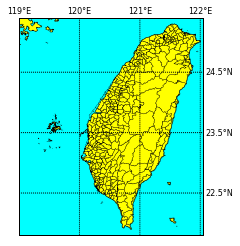

In [ ]:
fig = plt.figure()
ax=fig.add_subplot(111)
lllon,lllat,urlon,urlat = 119.0,21.8,122.05,25.4
map = Basemap(projection='cyl' , resolution='h', llcrnrlon=lllon , llcrnrlat=lllat, urcrnrlon=urlon , urcrnrlat=urlat)
map.drawcoastlines(linewidth=0.5)
map.drawmapboundary(fill_color='cyan')
map.fillcontinents(color='yellow')
map.drawparallels(np.arange(21.5,26) , labels=[0,1,0,0], fontsize = 8)
map.drawmeridians(np.arange(119,123) , labels=[0,0,1,0], fontsize = 8)
SHP, MOI="TOWN_MOI_1090324","TOWN_MOI_1090324"
map.readshapefile(SHP, MOI, linewidth=0.25,drawbounds=True)

plt.show()

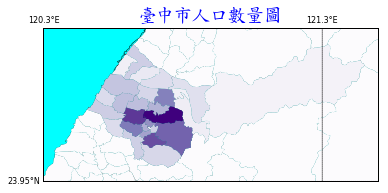

In [ ]:
fig = plt.figure()
ax=fig.add_subplot(111)
lllon,lllat,urlon,urlat =120.3,23.95,121.5,24.5
map = Basemap(projection='cyl' , resolution='h', llcrnrlon=lllon , llcrnrlat=lllat, urcrnrlon=urlon , urcrnrlat=urlat)
map.drawcoastlines(linewidth=0.5)
map.drawmapboundary(fill_color='cyan')
#map.fillcontinents(color='yellow')
map.drawparallels(np.arange(lllat,urlat) , labels=[1,0,0,0], fontsize = 8)
map.drawmeridians(np.arange(lllon,urlon) , labels=[0,0,1,0], fontsize = 8)
SHP, MOI="TOWN_MOI_1090324","TOWN_MOI_1090324"
map.readshapefile(SHP, MOI, linewidth=0.25,drawbounds=True)

citylst,patches=[],[]
df = pd.read_csv("臺中市各區人口數 (1).csv")
data=dict(zip('臺中市:'+df.Name, df.Population))
for info,shape in zip(map.TOWN_MOI_1090324_info, map.TOWN_MOI_1090324):
    citylst.append(info['COUNTYNAME']+':'+info['TOWNNAME'])
    patches.append(Polygon(np.array(shape), True))
p, colors = set_colorTown(patches,citylst,data,)
p.set_array(colors)
ax.add_collection(p)

plt.title("臺中市人口數量圖",fontproperties=font1,size=20,color='b')
plt.show()

In [ ]:
def set_colorTown(patches,citylst,data,c_map='Purples'):
    allTown,allValues=data.keys(),data.values()
    basedValue=min(allValues)-mean(allValues)/4
    clr=np.zeros((len(citylst)))
    for i in range(len(citylst)):
      clr[i]=data[citylst[i]] if citylst[i] in allTown else basedValue
    return PatchCollection(patches,cmap=c_map, linewidths=0.2,zorder=2),clr

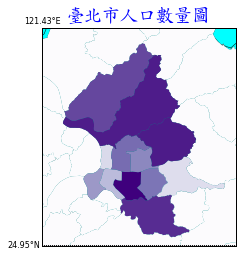

In [ ]:
fig = plt.figure()
ax=fig.add_subplot(111)
lllon,lllat,urlon,urlat = 121.43,24.95,121.68,25.23
map = Basemap(projection='cyl' , resolution='h', llcrnrlon=lllon , llcrnrlat=lllat, urcrnrlon=urlon , urcrnrlat=urlat)
map.drawcoastlines(linewidth=0.5)
map.drawmapboundary(fill_color='cyan')
#map.fillcontinents(color='yellow')
map.drawparallels(np.arange(lllat,urlat) , labels=[1,0,0,0], fontsize = 8)
map.drawmeridians(np.arange(lllon,urlon) , labels=[0,0,1,0], fontsize = 8)
SHP, MOI="TOWN_MOI_1090324","TOWN_MOI_1090324"
map.readshapefile(SHP, MOI, linewidth=0.25,drawbounds=True)

citylst,patches=[],[]
df = pd.read_csv("臺北市各區人口數.csv")
data=dict(zip('臺北市:'+df.Name, df.Population))
for info,shape in zip(map.TOWN_MOI_1090324_info, map.TOWN_MOI_1090324):
    citylst.append(info['COUNTYNAME']+':'+info['TOWNNAME'])
    patches.append(Polygon(np.array(shape), True))
p, colors = set_colorTown(patches,citylst,data,)
p.set_array(colors)
ax.add_collection(p)

plt.title("臺北市人口數量圖",fontproperties=font1,size=20,color='b')
plt.show()

In [ ]:
for i in map. TOWN_MOI_1090324_info:
  print(i)

In [ ]:
!ls